In [1]:
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
%run train_snake.py

FILEHOME = os.path.abspath(os.path.curdir)
datapath = FILEHOME + '/data/cpg_output_snake_2s_1.txt'

model = Model(datapath, 'snake')
gp = SGPRegression(model)

gp.train()

gpdata = gp.test_data[:5000, :]
gplabels = gp.test_labels[:5000, :]
gppred = gp.test(gpdata)[0]

gppred_diff = np.abs(gppred - gplabels)

/home/colin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
 /home/colin/anaconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.


done Reading


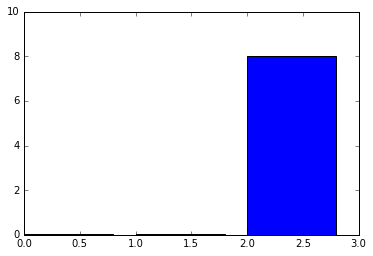

In [2]:
avg_diffs = np.mean(gppred_diff, axis=0)
plt.bar(np.arange(avg_diffs[0:3].shape[0]),avg_diffs[0:3])
plt.ylim(0,10)
plt.show()

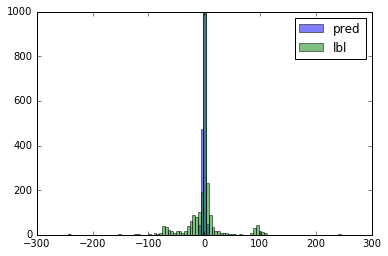

In [3]:
column = 2
bins = np.linspace(np.min(gplabels[:,column]),
                  np.max(gplabels[:,column]), 100)
n, bins_out, plot = plt.hist(gppred[:,column], bins, alpha=0.5, label="pred")
n, bins_out, plot = plt.hist(gplabels[:,column], bins, alpha=0.5, label="lbl")
plt.legend(loc="upper right")
plt.ylim([0, 1000])
plt.show()


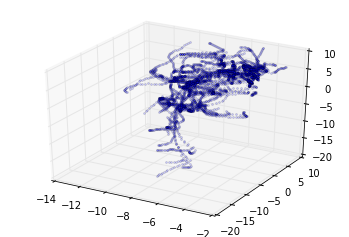

In [11]:
gppred_diff = np.sum(np.abs(gppred - gp.test_labels[:5000,:]), axis=1)

fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(gp.start_states[:5000,3]-gp.start_states[:5000,1],gp.start_states[:5000,2],
            gp.end_states[:5000,2], 'o', ms=2, alpha=0.2)
# plt.colorbar(c)
plt.show()

In [14]:
gp.controls.shape

(50005, 24)